loading Roboflow workspace...
loading Roboflow project...
{
  "id": "container-damage-detection-full/3",
  "name": "Container Damage Detection Full",
  "version": "3",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}


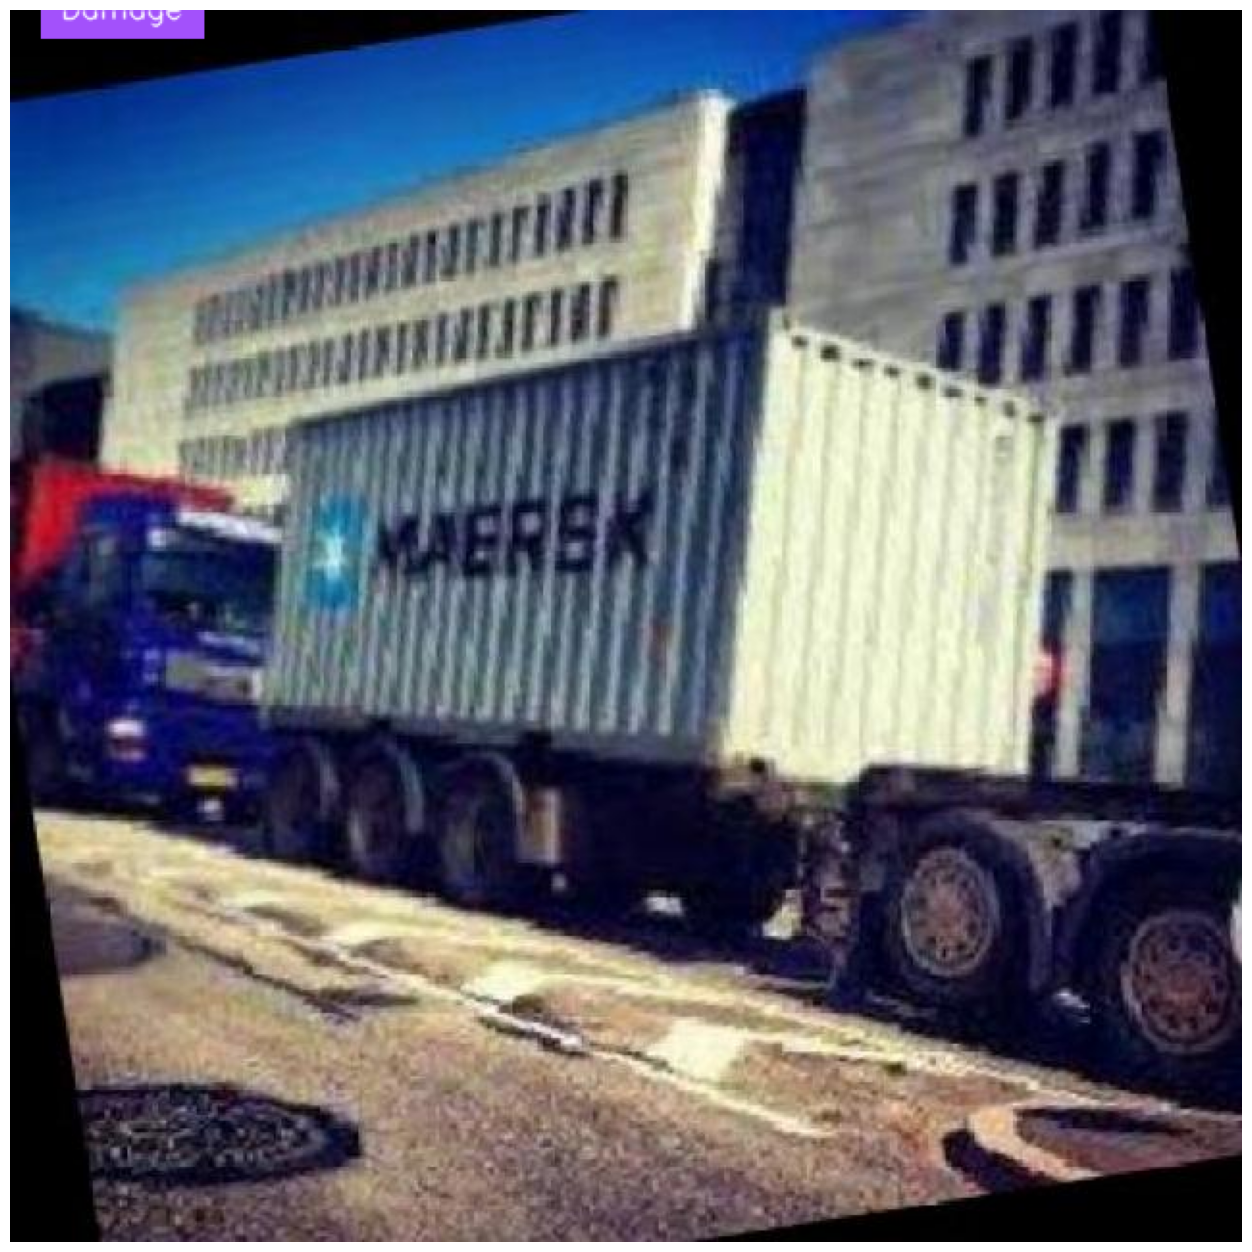

In [1]:
from roboflow import Roboflow
import supervision as sv
import cv2

image_directory = "/home/emma/facultad/pps/sanitized/valid/images/"
image_name = "0a67f28ec4a4490be29fce31e5998a7f1d9c3075_jpg.rf.8cb2405d6c2bd0a2f486ee3f5894125d.jpg"

import os
image = os.path.join(image_directory, image_name)

rf = Roboflow(api_key="ooPxxzLT1xgs8CWEiMjY")
project = rf.workspace().project("container-damage-detection-full")
model = project.version(3).model
print(model)
result = model.predict(image, confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread(image)

annotated_image = label_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))